In [ ]:
time_steps = 1
train_images_rnn = np.expand_dims(train_images, axis=1)  # (batch_size, time_steps, IMG_SIZE, IMG_SIZE, channels)
valid_images_rnn = np.expand_dims(valid_images, axis=1)  # (batch_size, time_steps, IMG_SIZE, IMG_SIZE, channels)
test_images_rnn = np.expand_dims(test_images, axis=1)    # (batch_size, time_steps, IMG_SIZE, IMG_SIZE, channels)

# RNN Model Definition
def create_rnn_model():
    rnn_model = Sequential([
        TimeDistributed(Flatten(), input_shape=(time_steps, IMG_SIZE, IMG_SIZE, 3)),
        SimpleRNN(128, activation='relu', return_sequences=True),
        SimpleRNN(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(len(label_names), activation='softmax')
    ])
    rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return rnn_model

rnn_model = create_rnn_model()

# Model Training
rnn_history = rnn_model.fit(
    train_images_rnn, train_labels,
    epochs=5,
    validation_data=(valid_images_rnn, valid_labels),
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

#Output



```
Epoch 1/5
71/71 [==============================] - 47s 634ms/step - loss: 2592.6550 - accuracy: 0.3467 - val_loss: 227.7466 - val_accuracy: 0.5392
Epoch 2/5
71/71 [==============================] - 34s 479ms/step - loss: 513.5032 - accuracy: 0.4142 - val_loss: 244.1637 - val_accuracy: 0.5760
Epoch 3/5
71/71 [==============================] - 35s 495ms/step - loss: 190.1664 - accuracy: 0.4507 - val_loss: 560.7463 - val_accuracy: 0.1244
Epoch 4/5
71/71 [==============================] - 36s 511ms/step - loss: 217.1110 - accuracy: 0.4071 - val_loss: 76.8435 - val_accuracy: 0.6037
Epoch 5/5
71/71 [==============================] - 35s 490ms/step - loss: 22.8547 - accuracy: 0.4378 - val_loss: 2.2682 - val_accuracy: 0.5714

```



In [ ]:
import matplotlib.pyplot as plt

# Data from the training process
epochs = [1, 2, 3, 4, 5]
training_loss = [2592.6550, 513.5032, 190.1664, 217.1110, 22.8547]
training_accuracy = [0.3467, 0.4142, 0.4507, 0.4071, 0.4378]
validation_loss = [227.7466, 244.1637, 560.7463, 76.8435, 2.2682]
validation_accuracy = [0.5392, 0.5760, 0.1244, 0.6037, 0.5714]

# Plotting training and validation loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#Output

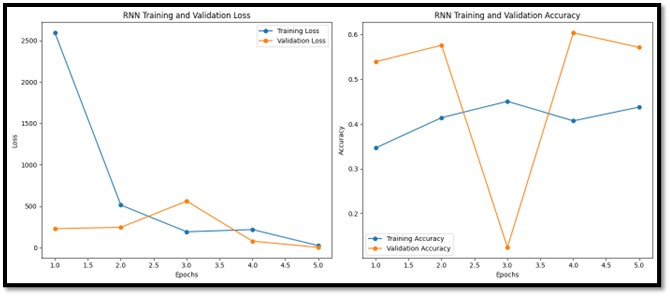

In [ ]:
from sklearn.metrics import accuracy_score

# Confusion Matrix and Classification Report for RNN
rnn_predictions = rnn_model.predict(test_images_rnn)
rnn_y_pred = np.argmax(rnn_predictions, axis=1)
rnn_true_labels = np.argmax(test_labels, axis=1)

# Calculate accuracy
rnn_accuracy = accuracy_score(rnn_true_labels, rnn_y_pred)

print('RNN Classification Report')
report = classification_report(rnn_true_labels, rnn_y_pred, target_names=label_names, labels=np.arange(len(label_names)))
print(report)
print(f"Accuracy: {rnn_accuracy:.2f}")

print('RNN Confusion Matrix')
rnn_cm = confusion_matrix(rnn_true_labels, rnn_y_pred, labels=np.arange(len(label_names)))
plt.figure(figsize=(10, 10))
sns.heatmap(rnn_cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Oputput



```
4/4 [==============================] - 79s 20s/step - loss: 2.2223 - accuracy: 0.8189
CNN Test accuracy: 0.8188976645469666
4/4 [==============================] - 79s 19s/step
CNN Classification Report
                 precision    recall  f1-score   support

     Cheesecake       0.86      0.60      0.71        10
       Macarons       0.85      0.96      0.90        74
 Macarons-Choco       0.00      0.00      0.00         1
  Macarons-Mint       0.00      0.00      0.00         2
  Macarons-Pink       0.00      0.00      0.00         1
   Macarons-Red       0.00      0.00      0.00         1
Macarons-Yellow       0.00      0.00      0.00         1
          Pizza       0.89      0.73      0.80        11
          Steak       1.00      0.67      0.80        15
       Tiramisu       0.53      0.82      0.64        11

       accuracy                           0.82       127
      macro avg       0.41      0.38      0.38       127
   weighted avg       0.80      0.82      0.80       127

CNN Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
```



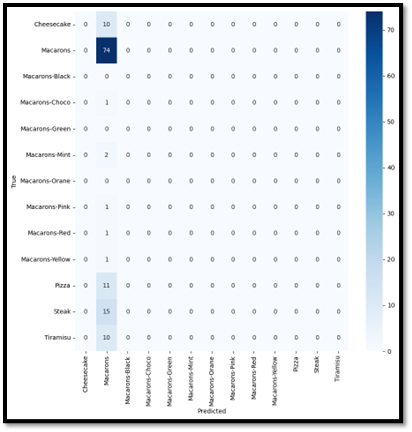